In [1]:
import mysql.connector
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = mysql.connector.connect(host = 'localhost',password='ritika', user='root', database = 'python')

if conn.is_connected():
    print('Connection established')

Connection established


In [3]:
query1 = 'Select * from orders;'
df_orders = pd.read_sql(query1, conn)

df_orders

,order_id,product_name,category,city,sales,profit
0,CA-2020-152156,p1,Furniture,Bangalore,10000,500
1,CA-2020-138688,p2,Furniture,Bangalore,20000,400
2,US-2019-108966,p3,Technology,Chennai,25000,200
3,CA-2021-114412,p4,Technology,Chennai,30000,250
4,CA-2020-161389,p5,Technology,Bangalore,35000,800
5,US-2019-118983,p6,Office Supplies,Bangalore,40000,700


In [5]:
## Select max(sales) from df

df_orders.sales.max()

40000

##### -->Whenever you have to answer questions like for each category, each region  or each city that's when we use group by.

In [6]:
## Select category, max(sales) from df group by category

df_orders.groupby('category').sales.max()

category
Furniture          20000
Office Supplies    40000
Technology         35000
Name: sales, dtype: int64

In [8]:
## Select category, max(sales), min(sales) from df group by category
df_orders.groupby('category').sales.agg(['mean', 'max', 'min', 'count'])

,mean,max,min,count
category,,,,
Furniture,15000.0,20000,10000,2
Office Supplies,40000.0,40000,40000,1
Technology,30000.0,35000,25000,3


In [9]:
## Select category,city max(sales), min(sales) from df group by category & city

df_orders.groupby(['category','city']).sales.agg(['mean', 'max', 'min', 'count'])

mean    max    min  count
category        city                                   
Furniture       Bangalore  15000.0  20000  10000      2
Office Supplies Bangalore  40000.0  40000  40000      1
Technology      Bangalore  35000.0  35000  35000      1
                Chennai    27500.0  30000  25000      2

<Axes: xlabel='category'>

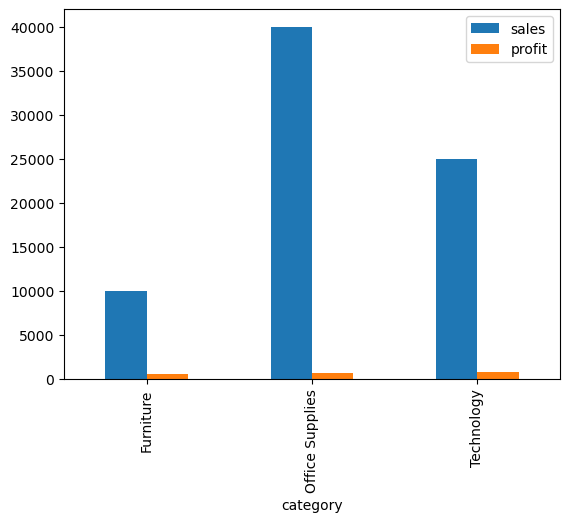

In [13]:
## Select category--> min(sales),max(profit) from df group by category
df_orders.groupby('category').agg({'sales': min, 'profit': max}).plot(kind='bar')

In [15]:
df_orders.groupby('category').agg({'sales': 'mean', 'profit': max})

,sales,profit
category,,
Furniture,15000.0,500
Office Supplies,40000.0,700
Technology,30000.0,800
